In [2]:
import casatools
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
import astropy.coordinates as ac
from astropy import units

In [3]:
cd ~/code/dsa2000sim

/Users/claw/code/dsa2000sim


In [4]:
tabname = 'antenna_positions_LWA_coordinates.tab'
#conf_file = 'LWA_coordinates.cfg'
conf_file = 'LWA352_tmp.cfg'

In [5]:
tb = casatools.table()
tb.fromascii(tabname, conf_file, firstline=3, sep=' ', columnnames=['X', 'Y', 'Z', 'DIAM', 'NAME'], datatypes=['D', 'D', 'D', 'D', 'A'])
xx=tb.getcol('X')
yy=tb.getcol('Y')
zz=tb.getcol('Z')
diam=tb.getcol('DIAM')
anames=tb.getcol('NAME')
tb.close()


True

In [6]:
# key antennas
i0 = np.where(anames == 'LWA-23')[0][0]
i1 = np.where(anames == 'LWA-27')[0][0]
i2 = np.where(anames == 'LWA-30')[0][0]
i3 = np.where(anames == 'LWA-31')[0][0]
i4 = np.where(anames == 'LWA-62')[0][0]
i5 = np.where(anames == 'LWA-93')[0][0]
i6 = np.where(anames == 'LWA-94')[0][0]
i351 = np.where(anames == 'LWA-351')[0][0]
i320 = np.where(anames == 'LWA-320')[0][0]
i319 = np.where(anames == 'LWA-319')[0][0]

Text(-118.2937964, 37.2478863, 'LWA-351')

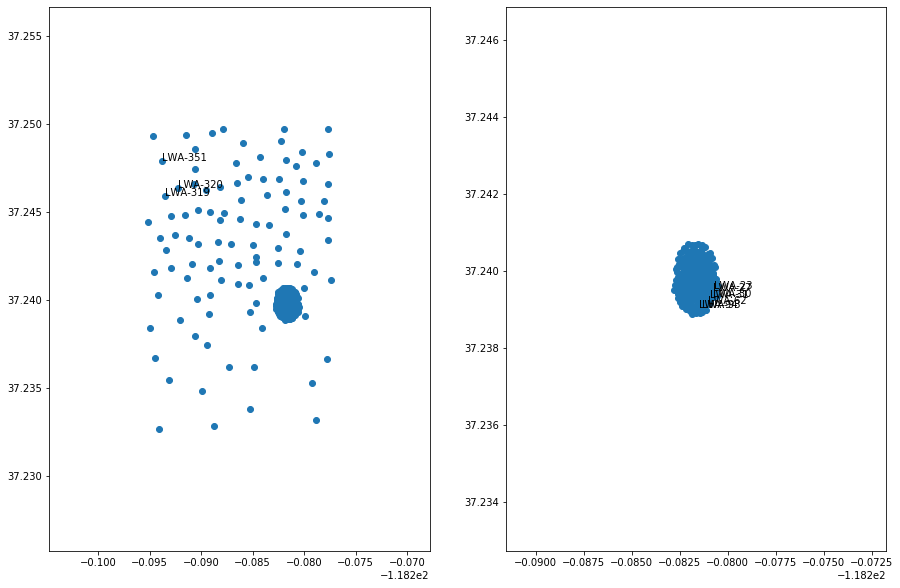

In [7]:
# select some
x0 = -2409000
y0 = -4477250
delta = 300
ww = np.where((xx < x0+delta)*(xx > x0)*(yy > y0)*(yy < y0+delta))

# plot them
fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(15,10))
pos = ac.EarthLocation.from_geocentric(x=xx, y=yy, z=zz, unit='m')
ax0.scatter(pos.lon.value, pos.lat.value)
ax1.scatter(pos.lon.value[ww], pos.lat.value[ww])
ax1.text(pos.lon.value[i0], pos.lat.value[i0], anames[i0])
ax1.text(pos.lon.value[i1], pos.lat.value[i1], anames[i1])
ax1.text(pos.lon.value[i2], pos.lat.value[i2], anames[i2])
ax1.text(pos.lon.value[i3], pos.lat.value[i3], anames[i3])
ax1.text(pos.lon.value[i4], pos.lat.value[i4], anames[i4])
ax1.text(pos.lon.value[i5], pos.lat.value[i5], anames[i5])
ax1.text(pos.lon.value[i6], pos.lat.value[i6], anames[i6])
ax0.text(pos.lon.value[i319], pos.lat.value[i319], anames[i319])
ax0.text(pos.lon.value[i320], pos.lat.value[i320], anames[i320])
ax0.text(pos.lon.value[i351], pos.lat.value[i351], anames[i351])

In [8]:
xxx = xx.copy()
yyy = yy.copy()
zzz = zz.copy()

# core ants
for ind, ii in enumerate([i0, i1, i2, i3, i4, i5, i6]):
    loc = ac.EarthLocation.from_geocentric(xx[ii], yy[ii], zz[ii], unit='m')
    loc2 = ac.EarthLocation.from_geodetic(lon=loc.lon + 3*units.arcsec, lat=loc.lat - 3*units.arcsec)
    print(xx[ii]-loc2.x.value, yy[ii]-loc2.y.value, zz[ii]-loc2.z.value)
    xxx[ii] = loc2.x.value
    yyy[ii] = loc2.y.value
    zzz[ii] = loc2.z.value

# sensitive area ants
loc = ac.EarthLocation.from_geocentric(xxx[i6], yyy[i6], zzz[i6], unit='m')
for ind, ii in enumerate([i319, i320, i351]):
    loc2 = ac.EarthLocation.from_geodetic(lon=loc.lon - (ind+1)*units.arcsec, lat=loc.lat - (0.2*(ind+1))*units.arcsec)
    print(xx[ii]-loc2.x.value, yy[ii]-loc2.y.value, zz[ii]-loc2.z.value)
    xxx[ii] = loc2.x.value
    yyy[ii] = loc2.y.value
    zzz[ii] = loc2.z.value    

-38.601422547362745 84.31985430885106 73.62896234402433
-38.601456829346716 84.31983842421323 73.6290327408351
-38.60166977252811 84.31974052917212 73.62918096035719
-38.601439508609474 84.3198458775878 73.62920593563467
-38.60153738223016 84.31980064883828 73.62936042062938
-38.60126618947834 84.31992454547435 73.62945280456915
-38.60104957409203 84.320023692213 73.6294596507214
-737.6097347619943 988.558539589867 685.2967294505797
-601.7614349988289 956.7963647795841 733.194867244456
-649.255566897802 1102.078909309581 871.8320902800187


(37.2375, 37.2415)

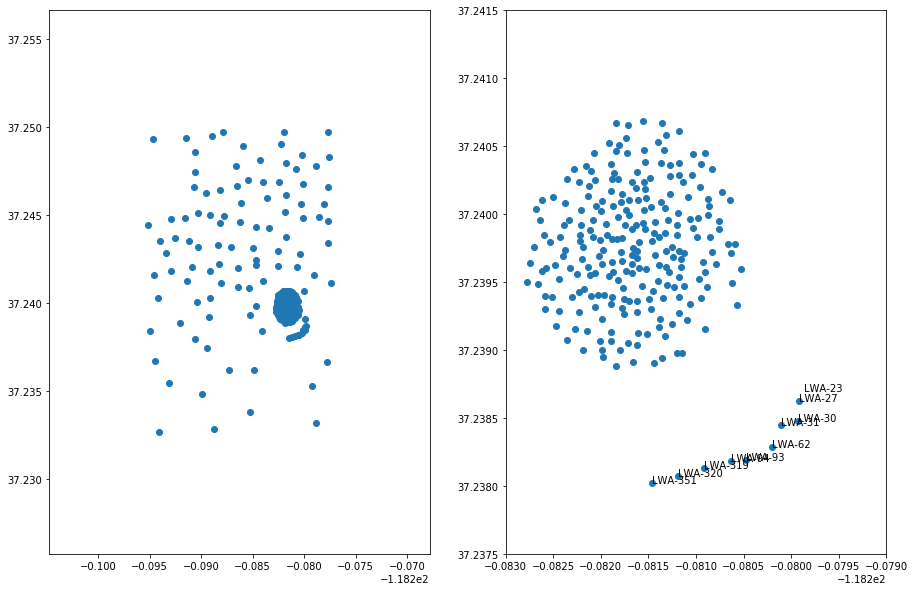

In [9]:
x0 = -2409100
y0 = -4477400
delta = 400
ww = np.where((xxx < x0+delta)*(xxx > x0)*(yyy > y0)*(yyy < y0+delta))

# plot them
fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(15,10))
pos = ac.EarthLocation.from_geocentric(x=xxx, y=yyy, z=zzz, unit='m')
ax0.scatter(pos.lon.value, pos.lat.value)
ax1.scatter(pos.lon.value[ww], pos.lat.value[ww])
ax1.text(pos.lon.value[i0], pos.lat.value[i0], anames[i0])
ax1.text(pos.lon.value[i1], pos.lat.value[i1], anames[i1])
ax1.text(pos.lon.value[i2], pos.lat.value[i2], anames[i2])
ax1.text(pos.lon.value[i3], pos.lat.value[i3], anames[i3])
ax1.text(pos.lon.value[i4], pos.lat.value[i4], anames[i4])
ax1.text(pos.lon.value[i5], pos.lat.value[i5], anames[i5])
ax1.text(pos.lon.value[i6], pos.lat.value[i6], anames[i6])
ax1.text(pos.lon.value[i319], pos.lat.value[i319], anames[i319])
ax1.text(pos.lon.value[i320], pos.lat.value[i320], anames[i320])
ax1.text(pos.lon.value[i351], pos.lat.value[i351], anames[i351])
ax1.set_xlim(-118.283, -118.279)
ax1.set_ylim(37.2375, 37.2415)

In [10]:
tab = Table([xxx, yyy, zzz, diam, anames], names=['x', 'y', 'z', 'diam', 'name'])
tab.write('LWA352_coordinates_mod.cfg', format='ascii', overwrite=True)

In [13]:
tab = Table([pos.lon.value, pos.lat.value], names=['lon', 'lat'])
tab.write('LWA352_latlon_mod.cfg', format='ascii', overwrite=True)